Given https://github.com/yutkin/Lenta.Ru-News-Dataset , perform EDA on it focusing on
the following:
- Provide descriptive statistics
- Anomaly detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

First, look at the data:

In [2]:
lenta_data = pd.read_csv('E:/PycharmProjects/data/lenta-ru-news.csv')
lenta_data.head()

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


Build the number of missing values:

In [3]:
lenta_data.isna().sum()

url          0
title        0
text         5
topic    62002
tags     27219
date         0
dtype: int64

Let's look at the distribution by tags and topics:

In [4]:
data_topics = lenta_data['topic'].value_counts().sort_values(ascending=False)
topics_count = pd.DataFrame(data_topics)
topics_count = topics_count.rename(columns={'topic': 'counts'})
data_tags = lenta_data['tags'].value_counts().sort_values(ascending=False)
tags_count = pd.DataFrame(data_tags)
tags_count  = tags_count.rename(columns={'tags': 'counts'})

In [5]:
topics_count

,counts
Россия,160445
Мир,136621
Экономика,79528
Спорт,64413
Культура,53797
Бывший СССР,53402
Наука и техника,53136
Интернет и СМИ,44663
Из жизни,27605
Дом,21734


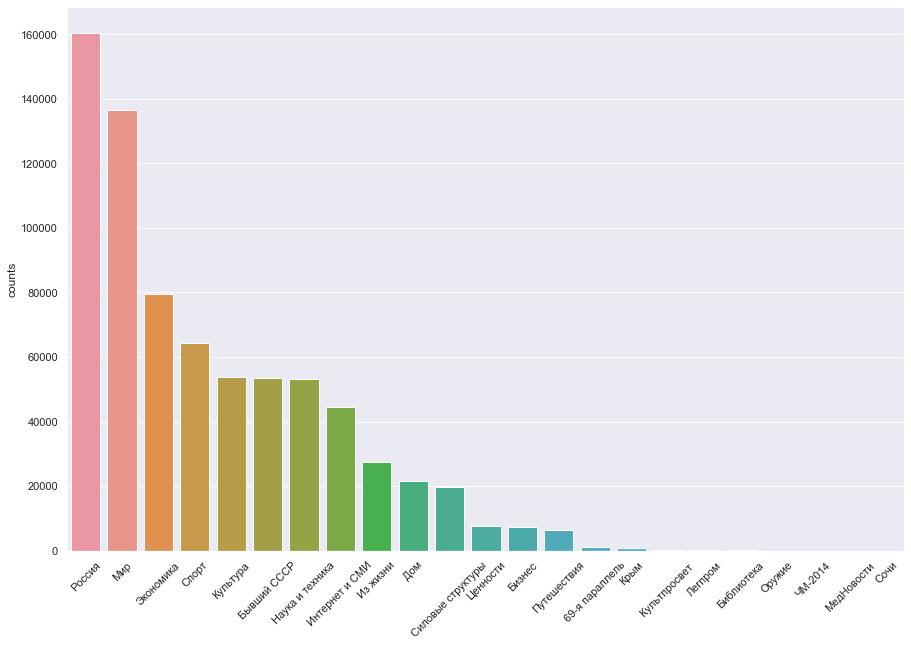

In [6]:
plt.figure(figsize=(15,10))
sbn.set(style="darkgrid")
ax = sbn.barplot(x = topics_count.index, y = 'counts' , data = topics_count)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [7]:
tags_count

,counts
Все,453762
Политика,40716
Общество,35202
Украина,22523
Происшествия,19825
...,...
Нацпроекты,6
Мировой опыт,6
Вооружение,3
Инновации,1


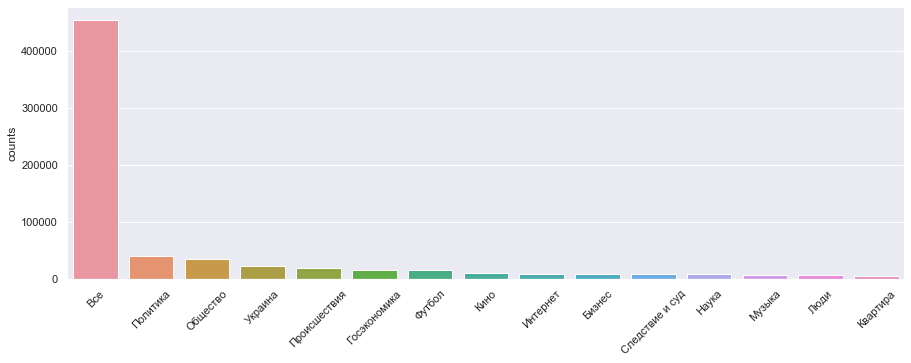

In [8]:
top_tags = tags_count[0:15]
plt.figure(figsize=(15,5))
sbn.set(style="darkgrid")
ax = sbn.barplot(x = top_tags.index, y = 'counts' , data = top_tags)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Let's look at the count distribution by tags and topics depending on the month:

In [9]:
lenta_data['date'] = pd.to_datetime(lenta_data['date'], infer_datetime_format=True)  
lenta_data.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18


In [10]:
counts_by_date = pd.DataFrame(lenta_data.groupby([lenta_data['date'].dt.month]).agg({'count'}))
counts_by_date = counts_by_date.drop(['url', 'text', 'date'], axis=1)
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
counts_by_date = counts_by_date.assign(month=pd.Series(month).values)
counts_by_date = counts_by_date.set_index('month')
counts_by_date

,title,topic,tags
,count,count,count
month,,,
January,58353,54783,56092
February,62648,58848,59972
March,67968,63952,65398
April,66657,61940,64211
May,62804,58050,60773
June,65679,60280,63449
July,68592,62206,66038
August,67274,61352,64858


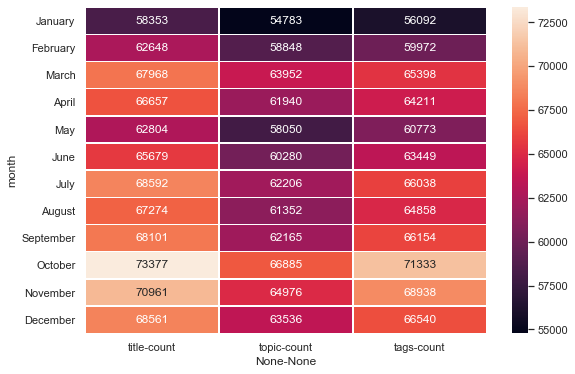

In [11]:
f, ax = plt.subplots(figsize=(9, 6))
sbn.heatmap(counts_by_date, annot=True, fmt="d", linewidths=.5, ax=ax)

Let's look at the count distribution by tags and topics depending on the year:

In [15]:
counts_by_date = pd.DataFrame(lenta_data.groupby([lenta_data['date'].dt.year]).agg({'count'}))
counts_by_date = counts_by_date.drop(['url', 'text', 'date'], axis=1)
counts_by_date

,title,topic,tags
,count,count,count
date,,,
1914,5,5,5
1999,3081,3081,3081
2000,16176,16176,16176
2001,21974,21974,21974
2002,22179,22179,22178
2003,21557,21557,21557
2004,24386,24386,24386
2005,30718,30696,30696


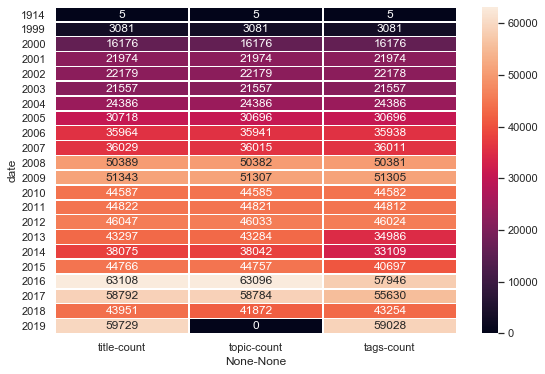

In [16]:
f, ax = plt.subplots(figsize=(9, 6))
sbn.heatmap(counts_by_date, annot=True, fmt="d", linewidths=.5, ax=ax)

Which are most popular words for Title?

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from PIL import Image
plt.style.use('seaborn')
from nltk.corpus import stopwords

words_cloud = lenta_data["title"].str.split("(").str[0].value_counts().keys()
russian_stopwords = stopwords.words("russian")

wc1 = WordCloud(stopwords=russian_stopwords,scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(words_cloud))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in News Titles",color='black',fontsize=20)
plt.show()

What about text?

In [ ]:
lenta_data['length']=lenta_data['text'].str.len()
lenta_data.dropna();
lenta_data.head()

In [ ]:
plt.figure(figsize=(12,5))

g = sbn.distplot(lenta_data['length'])
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=(23,10)
ax = sbn.boxplot(x="topic", y="length", data=lenta_data,width=0.8,linewidth=3)
ax.set_xlabel('Topics',fontsize=20)
ax.set_ylabel('Length of Description',fontsize=20)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

In [ ]:
plt.rcParams['figure.figsize']=(30,10)
ax = sbn.boxplot(x="tags", y="length", data=lenta_data,width=0.8,linewidth=3)
ax.set_xlabel('Tags',fontsize=20)
ax.set_ylabel('Length of Description',fontsize=20)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

In [ ]:
lenta_data['month']=lenta_data['date'].dt.month

plt.rcParams['figure.figsize']=(23,10)
ax = sbn.boxplot(x="month", y="length", data=lenta_data,width=0.8,linewidth=3)
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Length of Description',fontsize=20)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

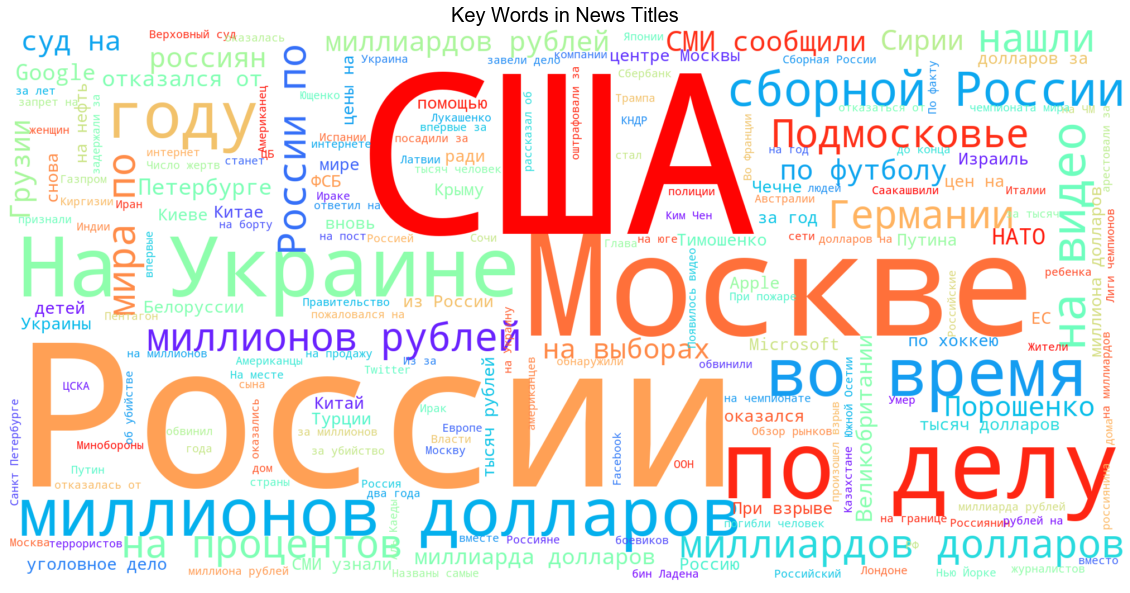

In [17]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from PIL import Image
plt.style.use('seaborn')
from nltk.corpus import stopwords

words_cloud = lenta_data["title"].str.split("(").str[0].value_counts().keys()
russian_stopwords = stopwords.words("russian")

wc1 = WordCloud(stopwords=russian_stopwords,scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(words_cloud))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in News Titles",color='black',fontsize=20)
plt.show()

What about text?

In [21]:
lenta_data['length']=lenta_data['text'].str.len()
lenta_data.dropna();
lenta_data.head()

,url,title,text,topic,tags,date,length
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16,901.0
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16,346.0
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17,1923.0
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17,703.0
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18,754.0


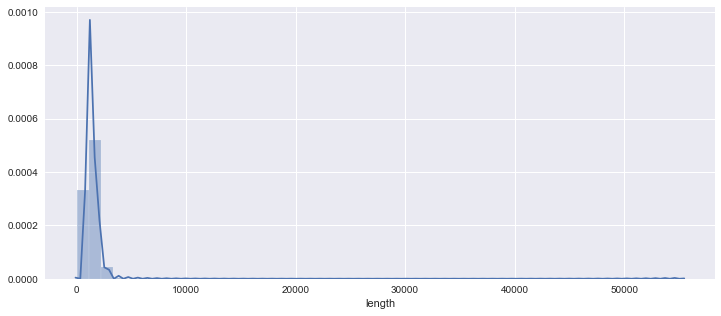

In [28]:
plt.figure(figsize=(12,5))

g = sbn.distplot(lenta_data['length'])
plt.show()

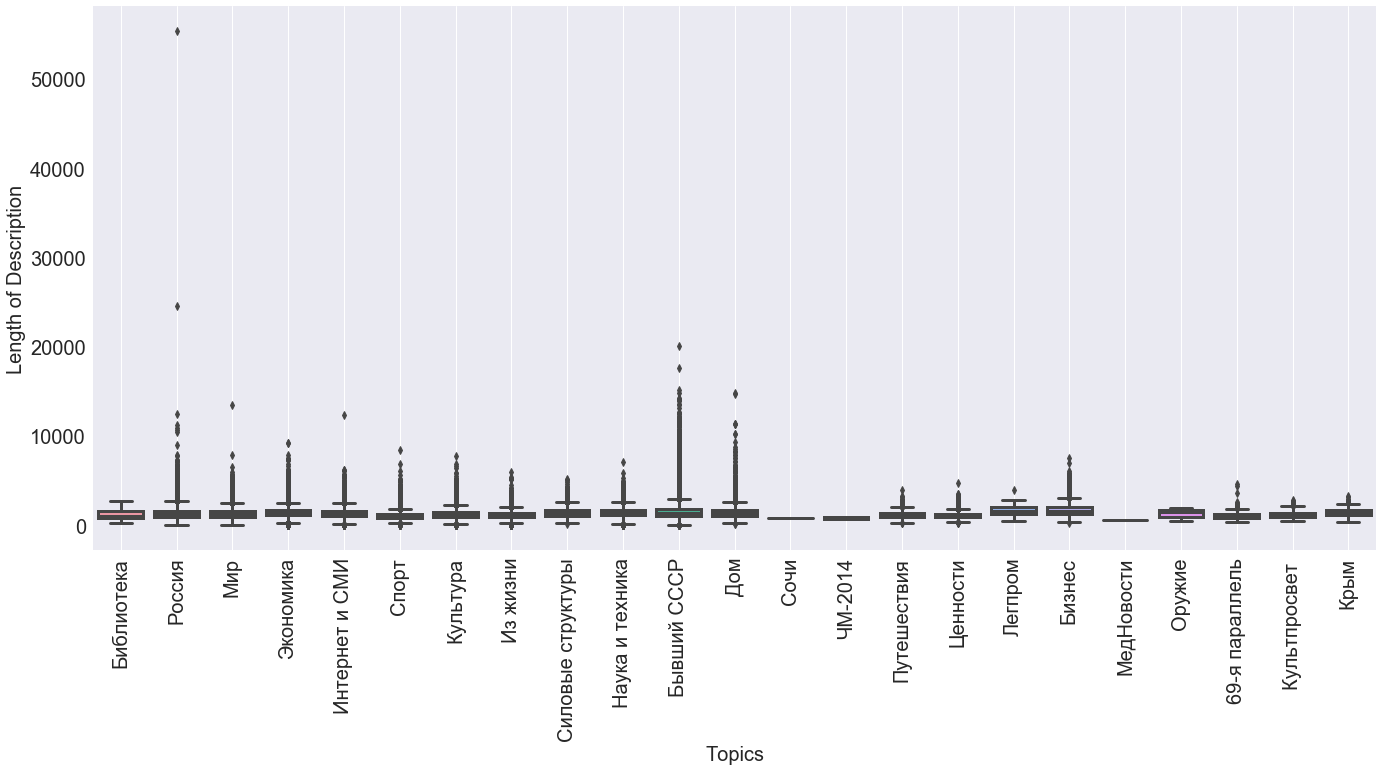

In [37]:
plt.rcParams['figure.figsize']=(23,10)
ax = sbn.boxplot(x="topic", y="length", data=lenta_data,width=0.8,linewidth=3)
ax.set_xlabel('Topics',fontsize=20)
ax.set_ylabel('Length of Description',fontsize=20)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

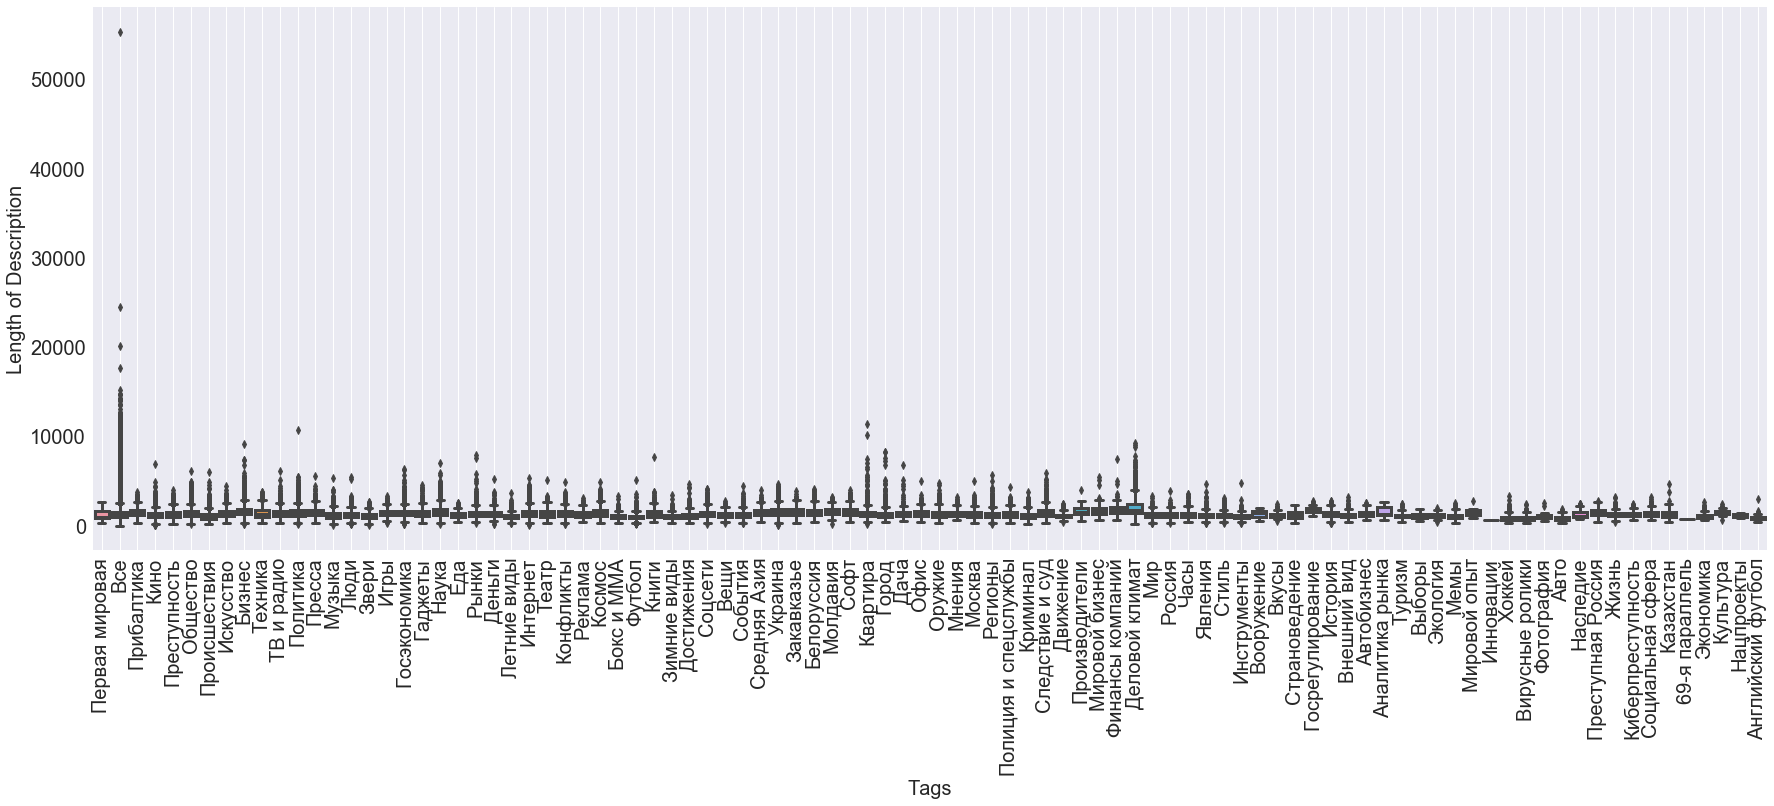

In [38]:
plt.rcParams['figure.figsize']=(30,10)
ax = sbn.boxplot(x="tags", y="length", data=lenta_data,width=0.8,linewidth=3)
ax.set_xlabel('Tags',fontsize=20)
ax.set_ylabel('Length of Description',fontsize=20)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

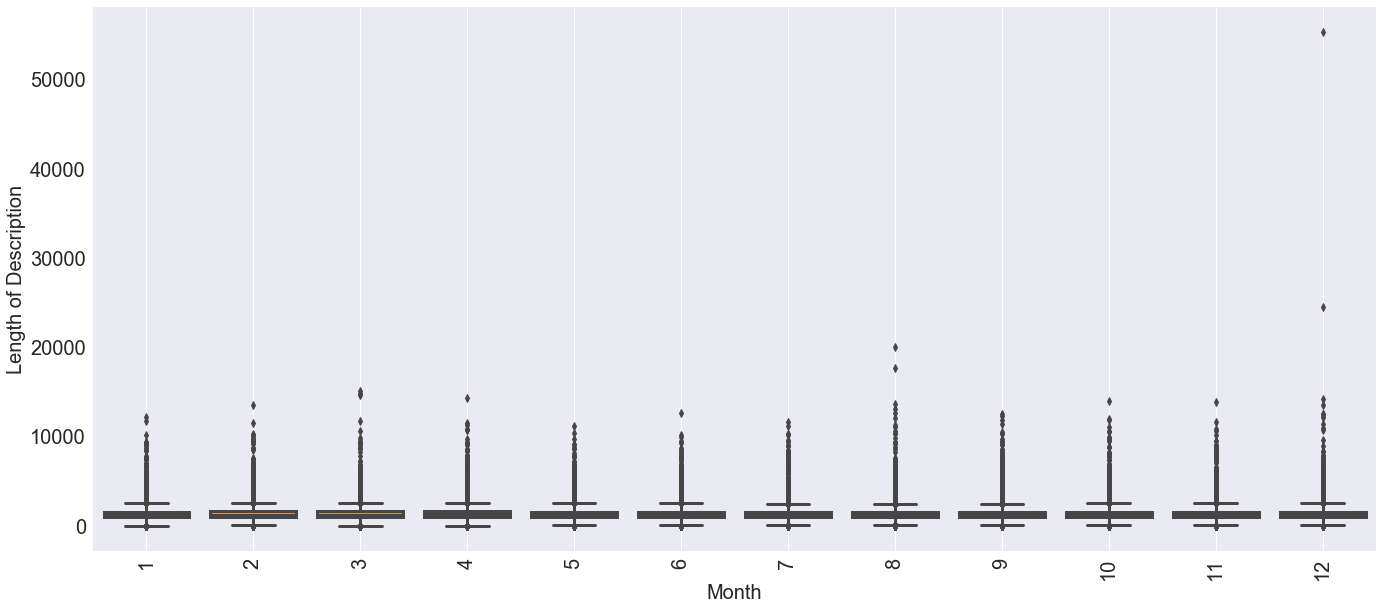

In [39]:
lenta_data['month']=lenta_data['date'].dt.month

plt.rcParams['figure.figsize']=(23,10)
ax = sbn.boxplot(x="month", y="length", data=lenta_data,width=0.8,linewidth=3)
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Length of Description',fontsize=20)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()